# **Лабораторная №2. Кластеризация**



## **1. Предобработка и анализ**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Считывание датасетов**

In [ ]:
blobs_df = pd.read_csv('lab2_blobs.csv', names=['x', 'y'], header=0)
checker_df = pd.read_csv('lab2_checker.csv', names=['x', 'y'], header=0)
noisymoons_df = pd.read_csv('lab2_noisymoons.csv', names=['x', 'y'], header=0)

### **1.2. Оценка данных**

In [ ]:
print(blobs_df.describe())
print(checker_df.describe())
print(noisymoons_df.describe())

                x           y
count  260.000000  260.000000
mean     0.128889    0.306402
std      5.277836    5.784841
min    -10.882000  -10.543400
25%     -6.125800   -4.001125
50%      1.917600   -0.603950
75%      4.040475    6.950550
max      8.921400   11.368800
                x           y
count  250.000000  250.000000
mean     3.646908    5.183671
std      2.286382    2.522758
min     -0.367000   -0.024100
25%      2.408200    4.282800
50%      3.322550    5.123200
75%      4.439800    6.553200
max      8.682800    9.940200
                x           y
count  280.000000  280.000000
mean     0.420280    0.299863
std      0.831229    0.492804
min     -1.083500   -0.950400
25%     -0.168400   -0.083950
50%      0.451250    0.308050
75%      0.949200    0.772400
max      2.064800    1.145700


<Axes: xlabel='x', ylabel='y'>

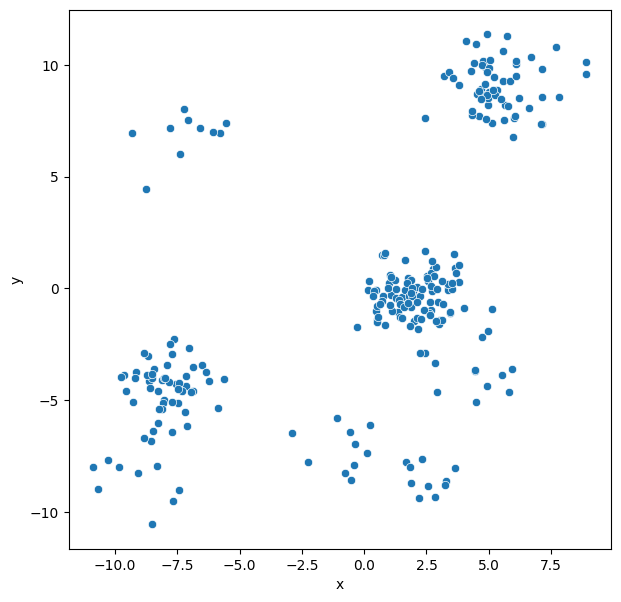

In [ ]:
sns.scatterplot(blobs_df, x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

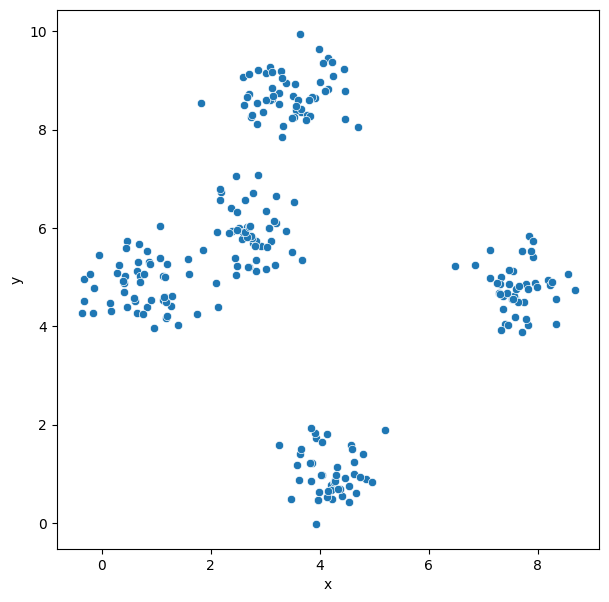

In [ ]:
sns.scatterplot(checker_df, x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

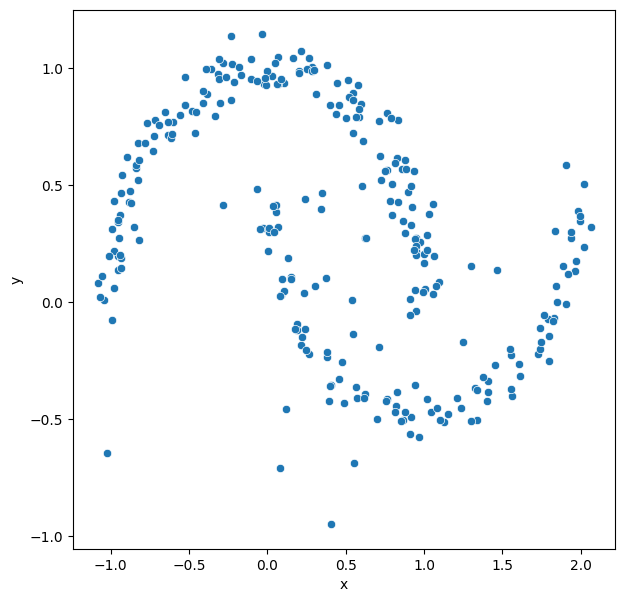

In [ ]:
sns.scatterplot(noisymoons_df, x='x', y='y')

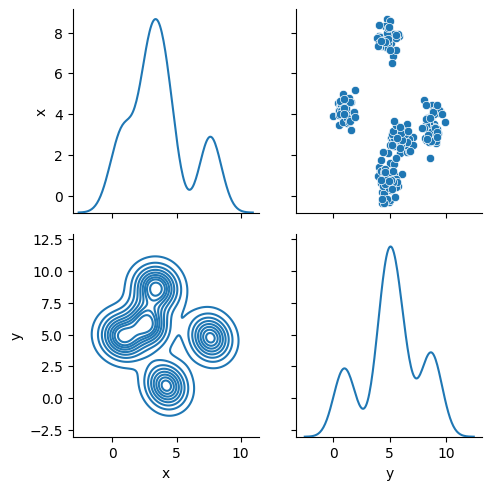

In [ ]:
checker_pg = sns.PairGrid(checker_df)
checker_pg.map_upper(sns.scatterplot)
checker_pg.map_lower(sns.kdeplot)
checker_pg.map_diag(sns.kdeplot)

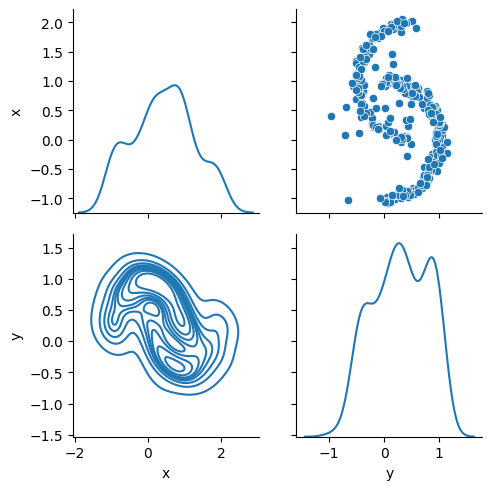

In [ ]:
noisymoons_pg = sns.PairGrid(noisymoons_df)
noisymoons_pg.map_upper(sns.scatterplot)
noisymoons_pg.map_lower(sns.kdeplot)
noisymoons_pg.map_diag(sns.kdeplot)

### **1.3. Масштабирование данных**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_s = MinMaxScaler()
min_max_s.set_output(transform='pandas')

std_s = StandardScaler()
std_s.set_output(transform='pandas')

blobs_min_max_s = min_max_s.fit_transform(blobs_df)
blobs_std_s = std_s.fit_transform(blobs_df)


checker_min_max_s = min_max_s.fit_transform(checker_df)
checker_std_s = std_s.fit_transform(checker_df)

noisymoons_min_max_s = min_max_s.fit_transform(noisymoons_df)
noisymoons_std_s = std_s.fit_transform(noisymoons_df)


<Axes: xlabel='x', ylabel='y'>

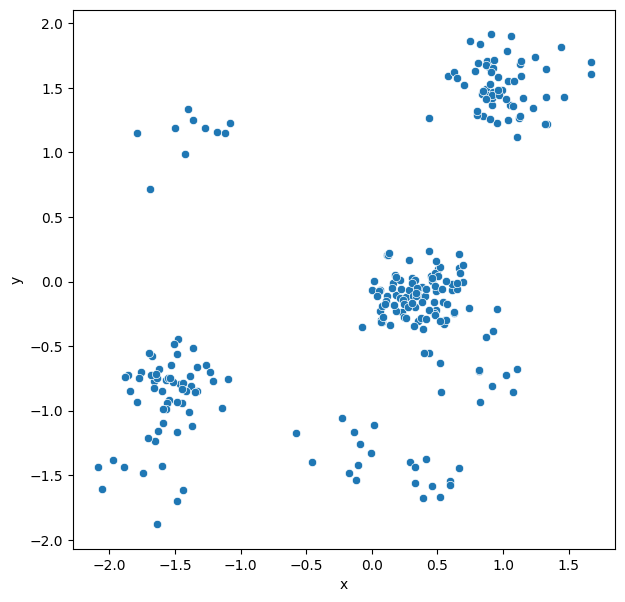

In [ ]:
sns.scatterplot(blobs_std_s, x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

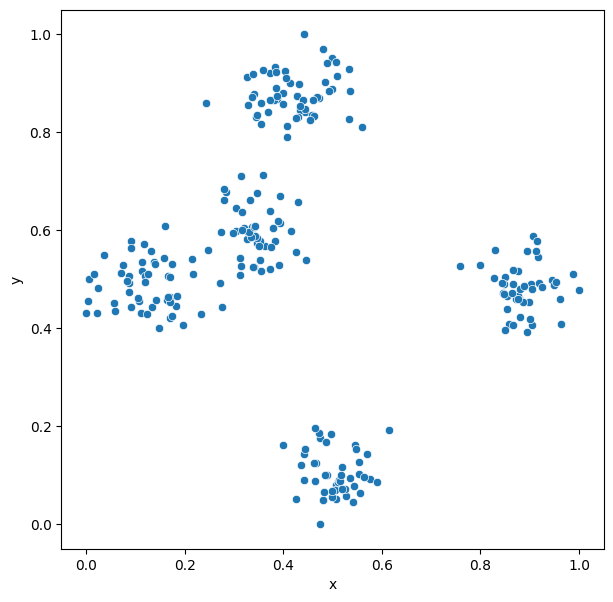

In [ ]:
sns.scatterplot(checker_min_max_s, x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

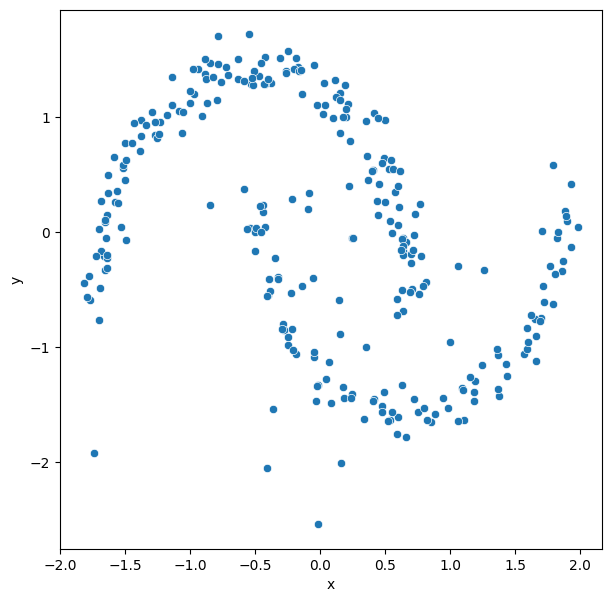

In [ ]:
sns.scatterplot(noisymoons_std_s, x='x', y='y')

## **2. KMeans**

In [ ]:
from sklearn.cluster import KMeans

### **2.1. Метод локтя**

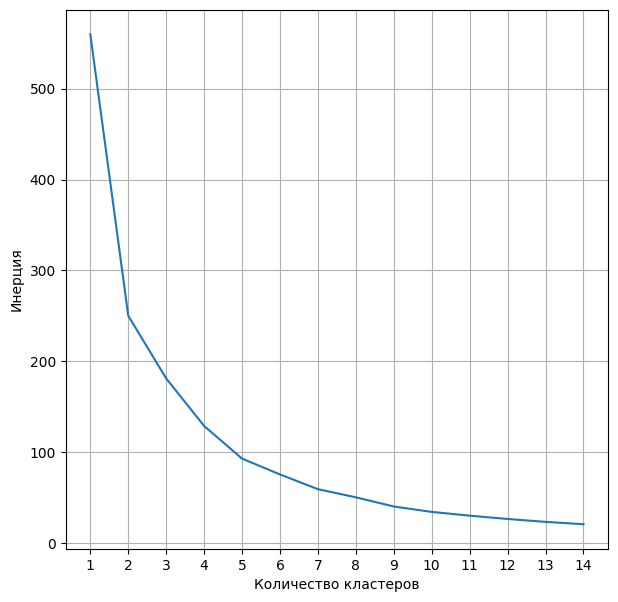

In [ ]:
from sklearn.cluster import KMeans
inertions = []
clusters_num = np.arange(1, 15)
for i in clusters_num:
    k_means = KMeans(i, n_init=5)
    k_means.fit(noisymoons_std_s)
    inertions.append(k_means.inertia_)

plt.plot(clusters_num, inertions)
plt.ylabel('Инерция')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_num)
plt.grid()
plt.show()


### **2.2. Метод силуэта**

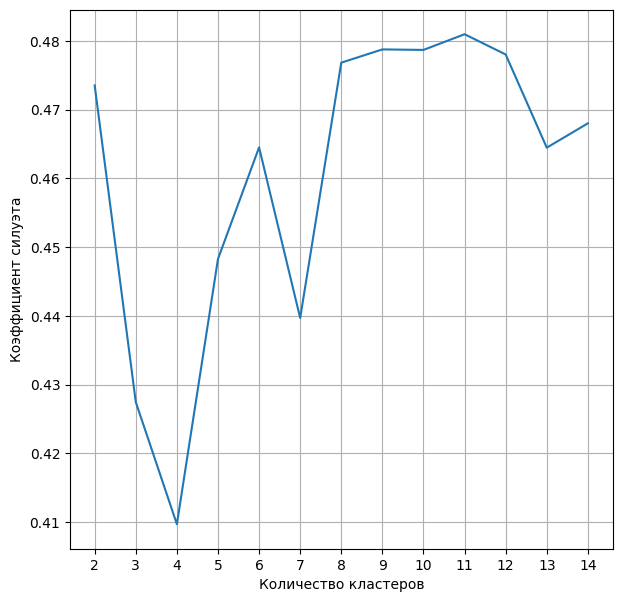

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_list = []
clusters_num = np.arange(2, 15)
for i in clusters_num:
    k_means = KMeans(i, n_init=5)
    clust_data = k_means.fit_predict(noisymoons_std_s)
    silhouette_list.append(silhouette_score(noisymoons_std_s, clust_data))


plt.plot(clusters_num, silhouette_list)
plt.ylabel('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_num)
plt.grid()
plt.show()



### **2.3. Кластеризация**

In [ ]:
clusters = KMeans(5, n_init=5).fit_predict(blobs_std_s)
blobs_clust = blobs_std_s.copy()
blobs_clust['cluster'] = clusters

clusters = KMeans(5, n_init=5).fit_predict(checker_min_max_s)
checker_clust = checker_min_max_s.copy()
checker_clust['cluster'] = clusters

clusters = KMeans(10, n_init=5).fit_predict(noisymoons_std_s)
noisymoons_clust = noisymoons_std_s.copy()
noisymoons_clust['cluster'] = clusters

<Axes: xlabel='x', ylabel='y'>

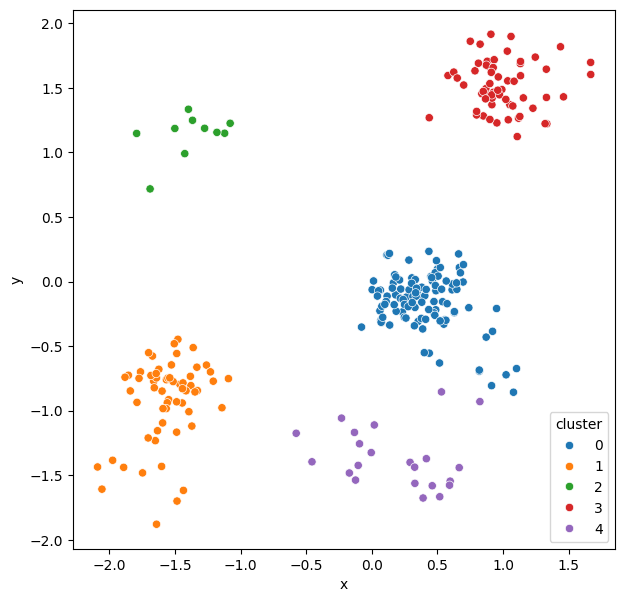

In [ ]:
sns.scatterplot(blobs_clust, x='x', y='y', hue='cluster', palette='tab10')

<Axes: xlabel='x', ylabel='y'>

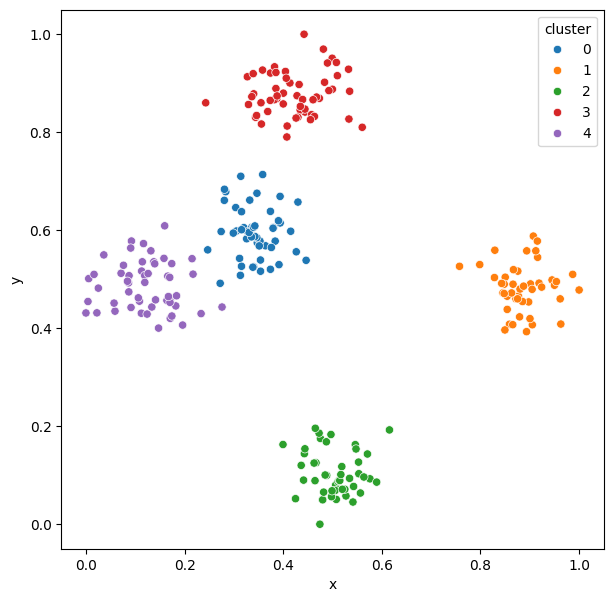

In [ ]:
sns.scatterplot(checker_clust, x='x', y='y', hue='cluster', palette='tab10')

<Axes: xlabel='x', ylabel='y'>

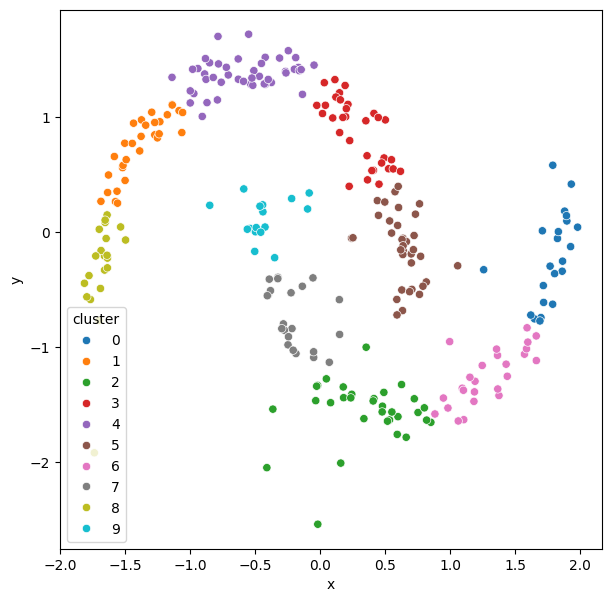

In [ ]:
sns.scatterplot(noisymoons_clust, x='x', y='y', hue='cluster', palette='tab10')

### **2.4. Диаграммы Вороного**

[[-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]
 [-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]
 [-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]
 ...
 [-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]
 [-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]
 [-2.06234309 -2.04234309 -2.02234309 ...  2.17765691  2.19765691
   2.21765691]]
[4 4 1 ... 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


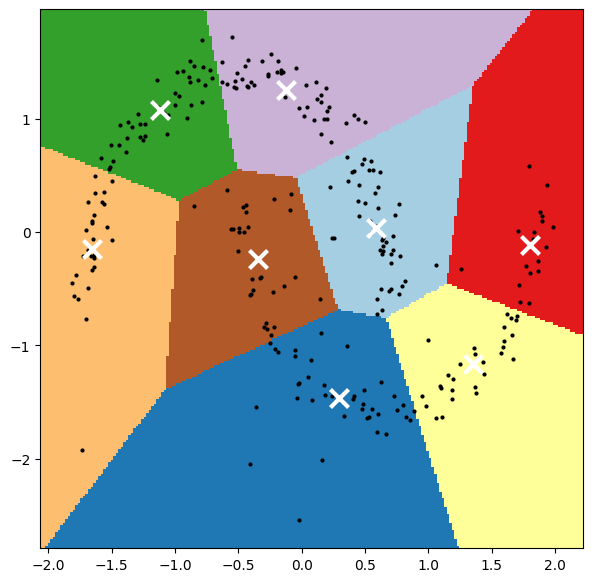

In [ ]:
h = 0.02
df = noisymoons_std_s
x_min, y_min = df.min()
x_max, y_max = df.max()
xx, yy = np.meshgrid(np.arange(x_min - 0.25, x_max + 0.25, h),
                     np.arange(y_min - 0.25, y_max + 0.25, h))
print(xx)
k_means = KMeans(8, n_init=5)
k_means.fit(df)

clusters = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
print(clusters)
clusters = clusters.reshape(xx.shape)
plt.imshow(
    clusters,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin='lower'
)
plt.scatter(df[['x']], df[['y']], s=4, c='black') #рисуем точки


plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    c="w",
)

### **2.5. Коробчатые диаграммы**

<Axes: xlabel='y'>

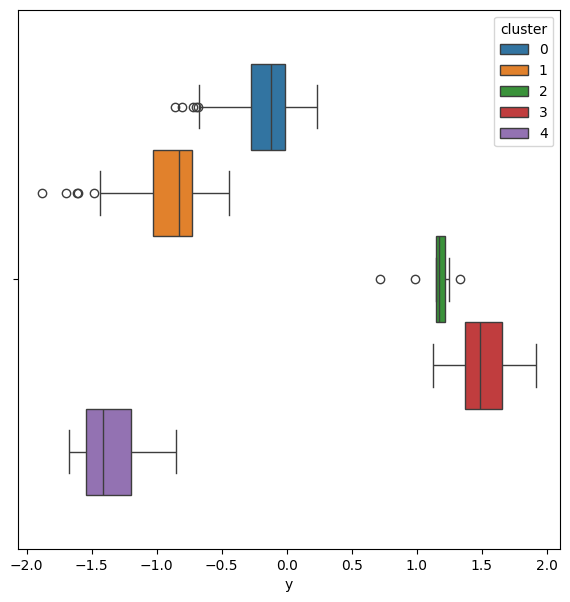

In [ ]:
sns.boxplot(blobs_clust, x='y', hue='cluster', palette='tab10')

<Axes: xlabel='x'>

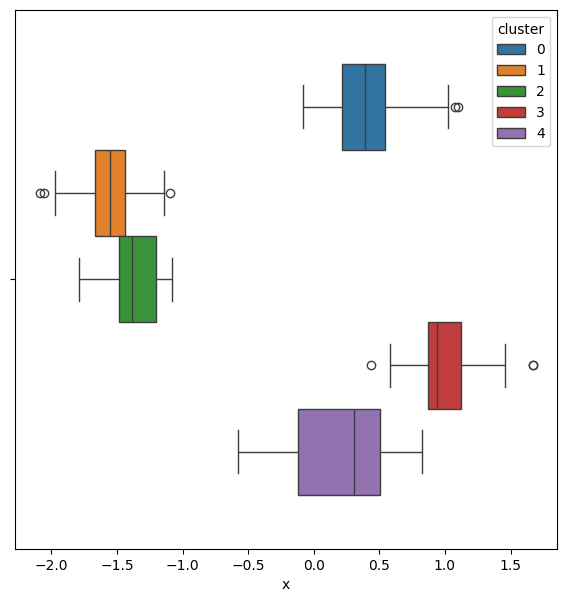

In [ ]:
sns.boxplot(blobs_clust, x='x', hue='cluster', palette='tab10')

<Axes: xlabel='x'>

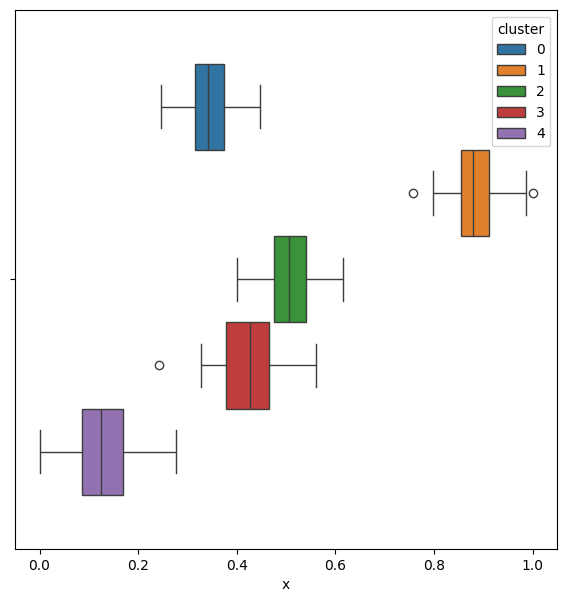

In [ ]:
sns.boxplot(checker_clust, x='x', hue='cluster', palette='tab10')

<Axes: xlabel='y'>

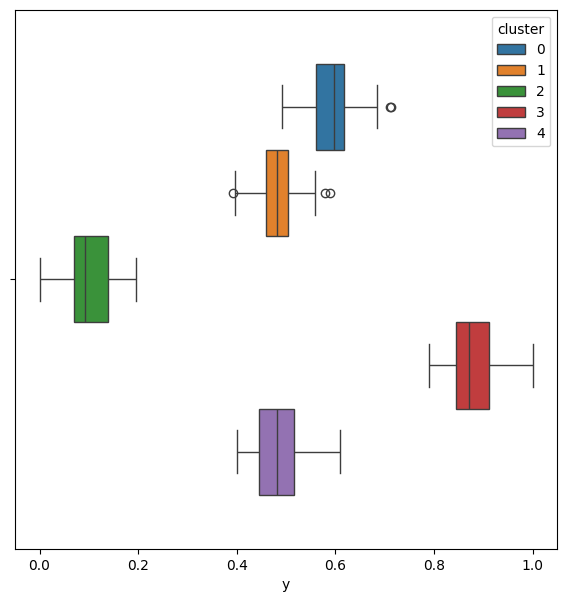

In [ ]:
sns.boxplot(checker_clust, x='y', hue='cluster', palette='tab10')

<Axes: xlabel='x'>

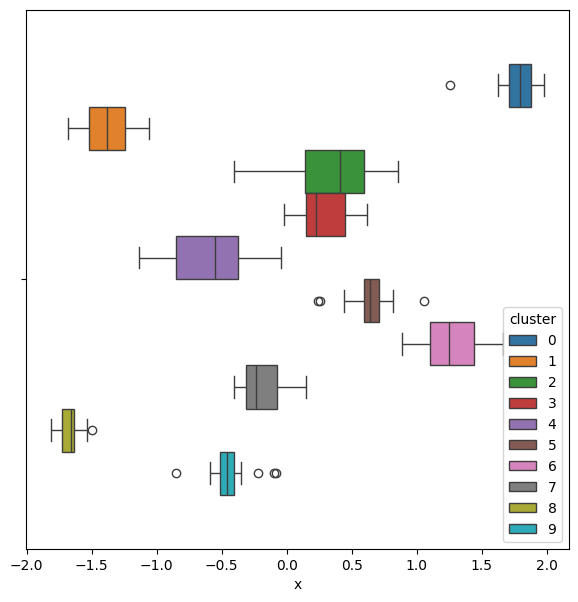

In [ ]:
sns.boxplot(noisymoons_clust, x='x', hue='cluster', palette='tab10')

<Axes: xlabel='y'>

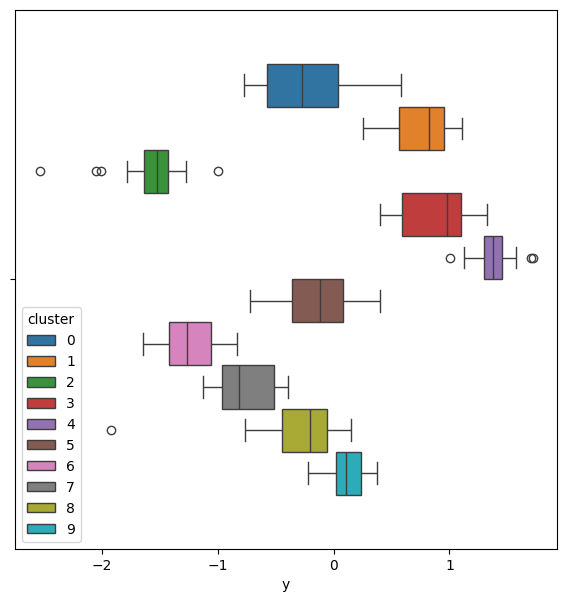

In [ ]:
sns.boxplot(noisymoons_clust, x='y', hue='cluster', palette='tab10')

### **2.6. Характеристики кластеров**

In [ ]:
print(blobs_clust.groupby('cluster').describe())
print(checker_clust.groupby('cluster').describe())
print(noisymoons_clust.groupby('cluster').describe())

             x                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
0        108.0  0.403477  0.250987 -0.078192  0.216155  0.387811  0.541873   
1         60.0 -1.562372  0.207478 -2.090274 -1.664764 -1.556329 -1.438312   
2         10.0 -1.382870  0.233653 -1.792325 -1.482269 -1.382049 -1.203845   
3         60.0  0.998670  0.237455  0.438108  0.868867  0.943369  1.121070   
4         22.0  0.185243  0.386740 -0.576153 -0.118632  0.309436  0.503811   

                       y                                                    \
              max  count      mean       std       min       25%       50%   
cluster                                                                      
0        1.103487  108.0 -0.155653  0.220154 -0.856902 -0.276253 -0.121231   
1       -1.092624   60.0 -0.924161  0.320424 -1.879175 -1.02937

## **3. DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
blobs_dbscan = blobs_std_s.copy()
blobs_dbscan['cluster'] = dbscan.fit_predict(blobs_std_s)

dbscan = DBSCAN(eps=0.1, min_samples=30)
checker_dbscan = checker_min_max_s.copy()
checker_dbscan['cluster'] = dbscan.fit_predict(checker_min_max_s)

dbscan = DBSCAN(eps=0.31, min_samples=7)
noisymoons_dbscan = noisymoons_std_s.copy()
noisymoons_dbscan['cluster'] = dbscan.fit_predict(noisymoons_std_s)

<Axes: xlabel='x', ylabel='y'>

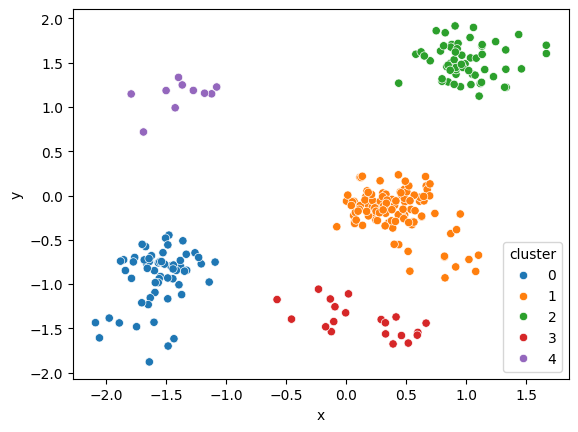

In [ ]:
sns.scatterplot(blobs_dbscan, x='x', y='y', hue='cluster', palette='tab10')

<Axes: xlabel='x', ylabel='y'>

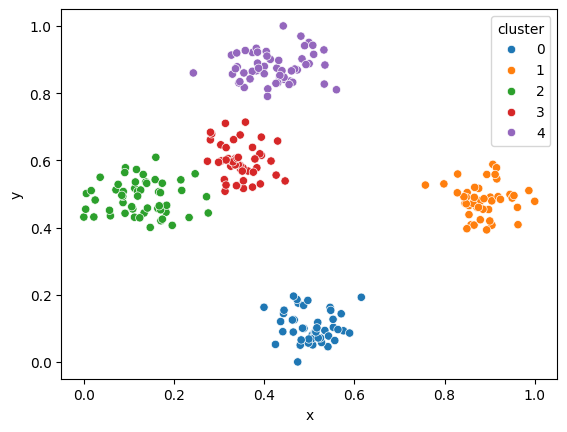

In [ ]:
sns.scatterplot(checker_dbscan, x='x', y='y', hue='cluster', palette='tab10')

<Axes: xlabel='x', ylabel='y'>

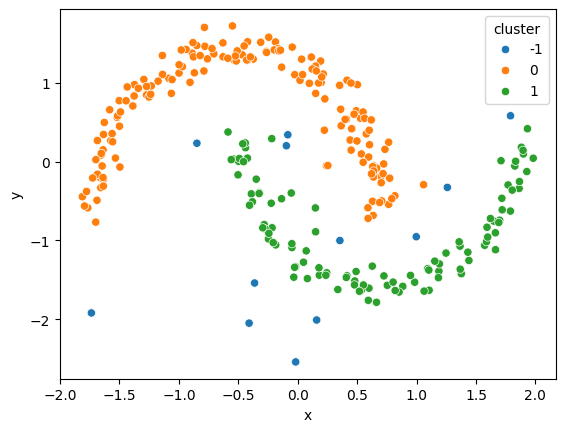

In [ ]:
sns.scatterplot(noisymoons_dbscan, x='x', y='y', hue='cluster', palette='tab10')

## **4. Иерархическая кластеризация**

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, linkage_tree

### **4.1. Проведение кластеризации**

In [ ]:
agc5_ward = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_distances=True)
agc5_average = AgglomerativeClustering(n_clusters=5, linkage='average', compute_distances=True)
agc5_complete = AgglomerativeClustering(n_clusters=5, linkage='complete', compute_distances=True)
agc5_single = AgglomerativeClustering(n_clusters=5, linkage='single', compute_distances=True)
agc2_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
agc2_average = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_distances=True)
agc2_complete = AgglomerativeClustering(n_clusters=2, linkage='average', compute_distances=True)
agc2_single = AgglomerativeClustering(n_clusters=2, linkage='complete', compute_distances=True)
agc10_ward = AgglomerativeClustering(n_clusters=10, linkage='ward', compute_distances=True)
agc10_average = AgglomerativeClustering(n_clusters=10, linkage='average', compute_distances=True)
agc10_complete = AgglomerativeClustering(n_clusters=10, linkage='complete', compute_distances=True)
agc10_single = AgglomerativeClustering(n_clusters=10, linkage='single', compute_distances=True)

In [ ]:
blobs_agc_ward = blobs_std_s.copy()
blobs_agc_ward['cluster'] = agc5_ward.fit_predict(blobs_std_s)

blobs_agc_average = blobs_std_s.copy()
blobs_agc_average['cluster'] = agc5_average.fit_predict(blobs_std_s)

blobs_agc_complete = blobs_std_s.copy()
blobs_agc_complete['cluster'] = agc5_complete.fit_predict(blobs_std_s)

blobs_agc_single = blobs_std_s.copy()
blobs_agc_single['cluster'] = agc5_single.fit_predict(blobs_std_s)

In [ ]:
checker_agc_ward = checker_min_max_s.copy()
checker_agc_ward['cluster'] = agc5_ward.fit_predict(checker_min_max_s)

checker_agc_average = checker_min_max_s.copy()
checker_agc_average['cluster'] = agc5_average.fit_predict(checker_min_max_s)

checker_agc_complete = checker_min_max_s.copy()
checker_agc_complete['cluster'] = agc5_complete.fit_predict(checker_min_max_s)

checker_agc_single = checker_min_max_s.copy()
checker_agc_single['cluster'] = agc5_single.fit_predict(checker_min_max_s)

In [ ]:
noisymoons_agc_ward = noisymoons_std_s.copy()
noisymoons_agc_ward['cluster'] = agc10_ward.fit_predict(noisymoons_std_s)

noisymoons_agc_average = noisymoons_std_s.copy()
noisymoons_agc_average['cluster'] = agc10_average.fit_predict(noisymoons_std_s)

noisymoons_agc_complete = noisymoons_std_s.copy()
noisymoons_agc_complete['cluster'] = agc10_complete.fit_predict(noisymoons_std_s)

noisymoons_agc_single= noisymoons_std_s.copy()
noisymoons_agc_single['cluster'] = agc10_single.fit_predict(noisymoons_std_s)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].set_title('ward')
axs[0][1].set_title('average')
axs[1][0].set_title('complete')
axs[1][1].set_title('single')
sns.scatterplot(blobs_agc_ward, x='x', y='y', hue='cluster', palette='tab10', ax=axs[0][0])
sns.scatterplot(blobs_agc_average, x='x', y='y', hue='cluster', palette='tab10', ax=axs[0][1])
sns.scatterplot(blobs_agc_complete, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][0])
sns.scatterplot(blobs_agc_single, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][1])

fig.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].set_title('ward')
axs[0][1].set_title('average')
axs[1][0].set_title('complete')
axs[1][1].set_title('single')

sns.scatterplot(checker_agc_ward, x='x', y='y', hue='cluster',palette='tab10', ax=axs[0][0])
sns.scatterplot(checker_agc_average, x='x', y='y', hue='cluster', palette='tab10', ax=axs[0][1])
sns.scatterplot(checker_agc_complete, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][0])
sns.scatterplot(checker_agc_single, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][1])

fig.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].set_title('ward')
axs[0][1].set_title('average')
axs[1][0].set_title('complete')
axs[1][1].set_title('single')
sns.scatterplot(noisymoons_agc_ward, x='x', y='y', hue='cluster', palette='tab10', ax=axs[0][0])
sns.scatterplot(noisymoons_agc_average, x='x', y='y', hue='cluster', palette='tab10', ax=axs[0][1])
sns.scatterplot(noisymoons_agc_complete, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][0])
sns.scatterplot(noisymoons_agc_single, x='x', y='y', hue='cluster', palette='tab10', ax=axs[1][1])

fig.show()

*Построение дендрограмм*

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### **Дендрограммы для blobs**

In [ ]:
agc5_ward.fit(blobs_std_s)
agc5_average.fit(blobs_std_s)
agc5_complete.fit(blobs_std_s)
agc5_single.fit(blobs_std_s)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=5)

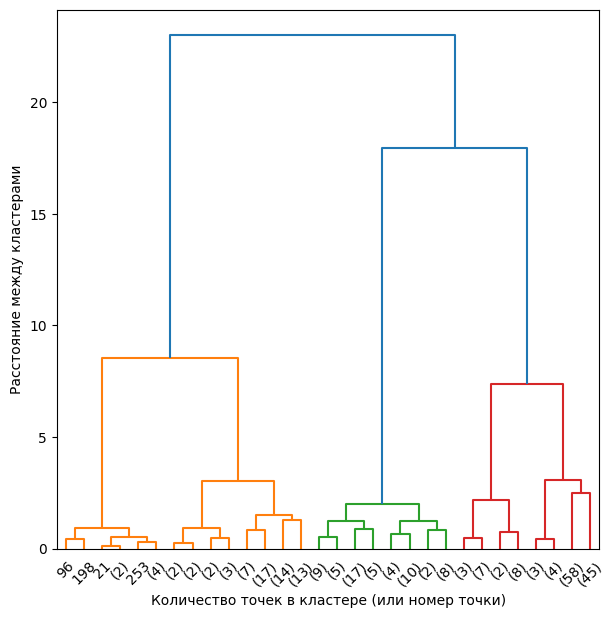

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
plot_dendrogram(agc5_ward, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

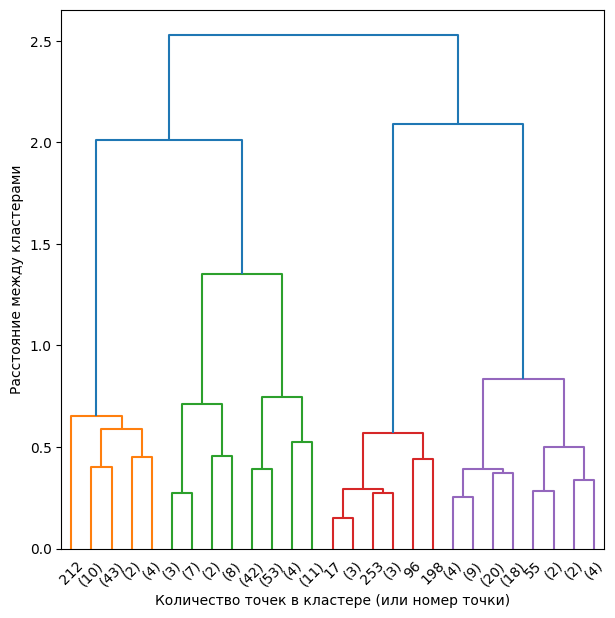

In [ ]:
plot_dendrogram(agc5_average, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

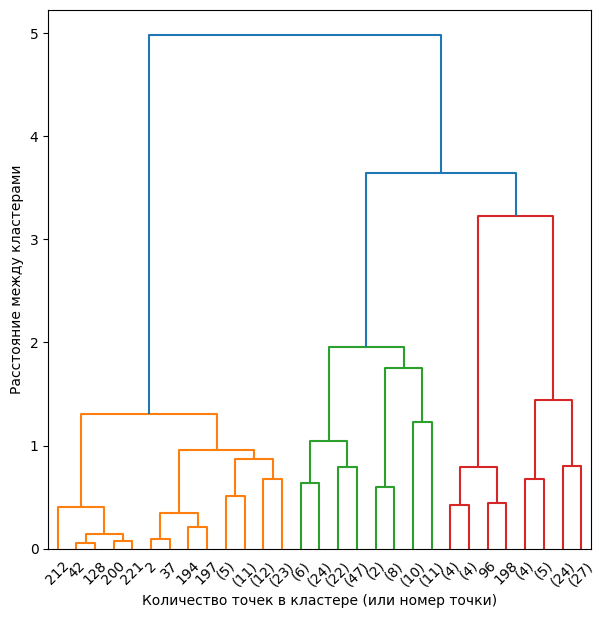

In [ ]:
plot_dendrogram(agc5_complete, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

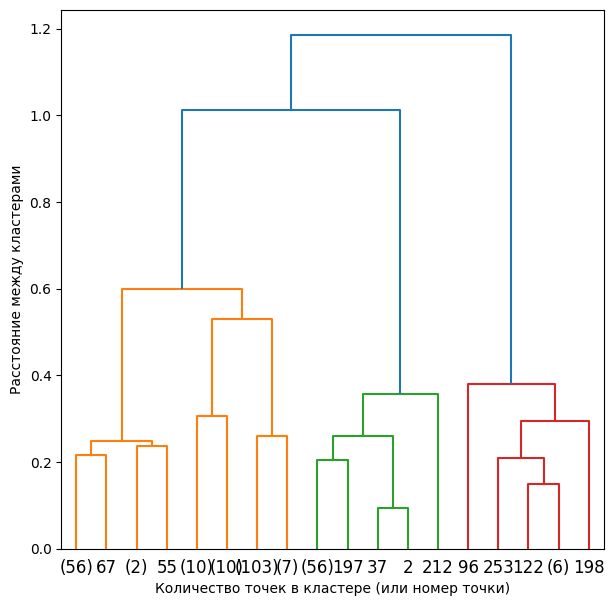

In [ ]:
plot_dendrogram(agc5_single, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

#### **Дендрограммы для checker**

In [ ]:
agc5_ward.fit(checker_min_max_s)
agc5_average.fit(checker_min_max_s)
agc5_complete.fit(checker_min_max_s)
agc5_single.fit(checker_min_max_s)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=5)

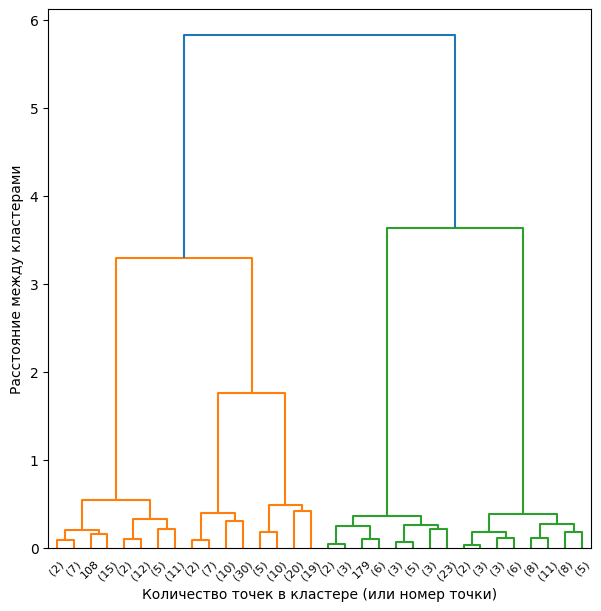

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
plot_dendrogram(agc5_ward, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

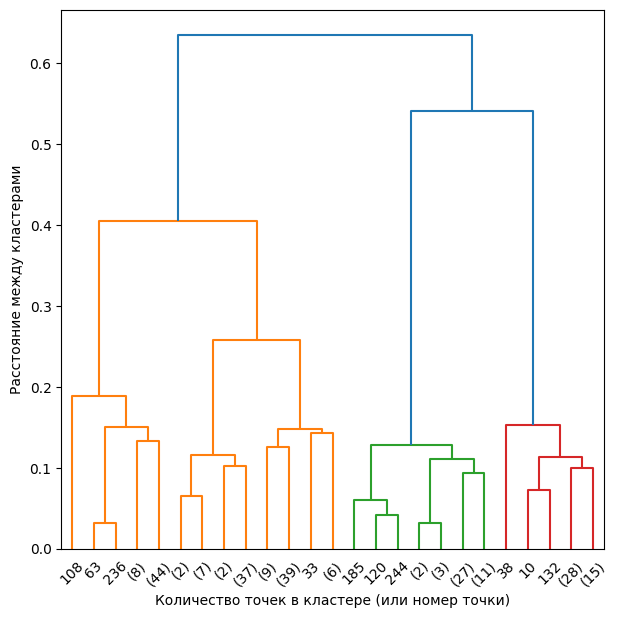

In [ ]:
plot_dendrogram(agc5_average, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

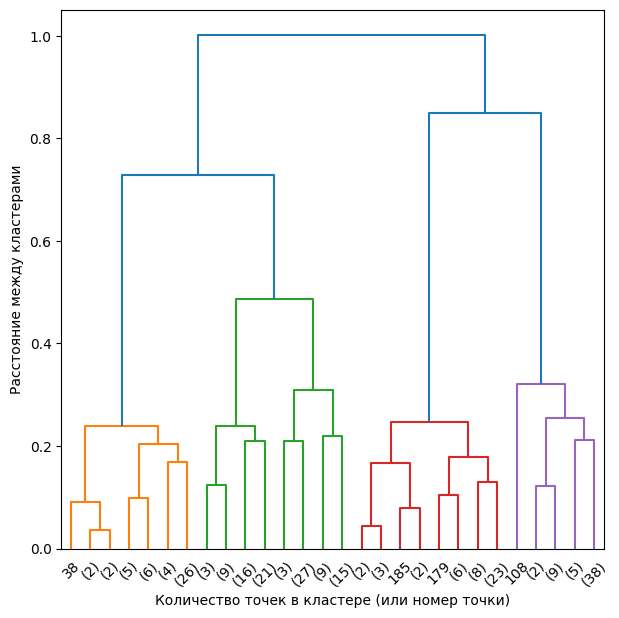

In [ ]:
plot_dendrogram(agc5_complete, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

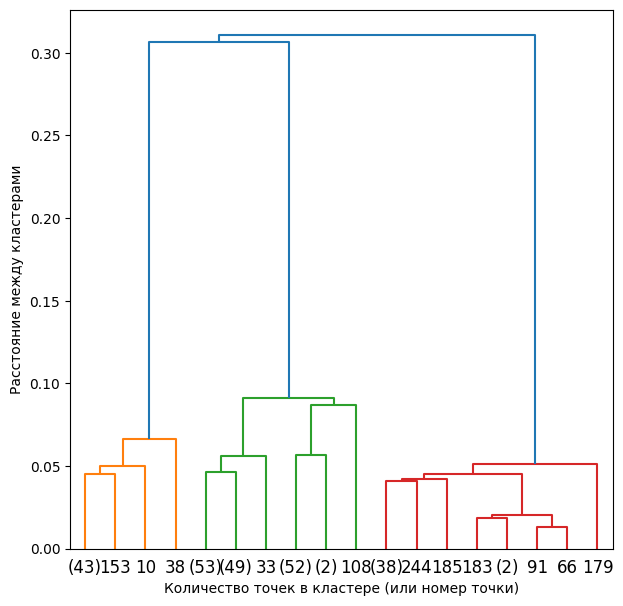

In [ ]:
plot_dendrogram(agc5_single, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

#### **Дендрограммы для noisymoons**

In [ ]:
agc10_ward.fit(noisymoons_std_s)
agc10_average.fit(noisymoons_std_s)
agc10_complete.fit(noisymoons_std_s)
agc10_single.fit(noisymoons_std_s)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=10)

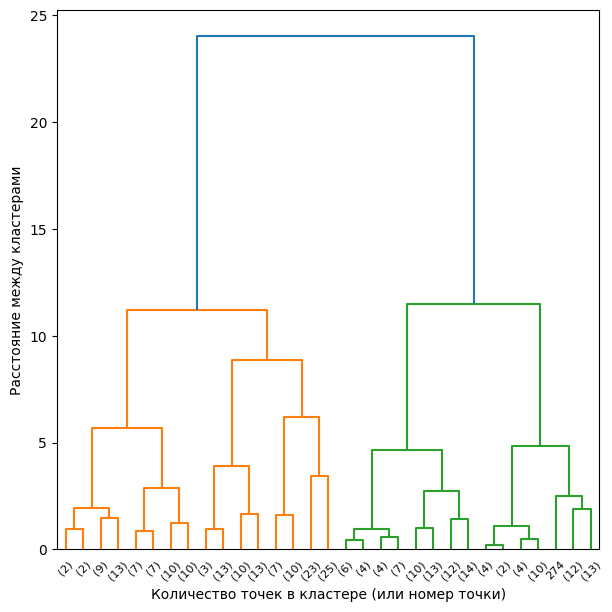

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
plot_dendrogram(agc10_ward, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

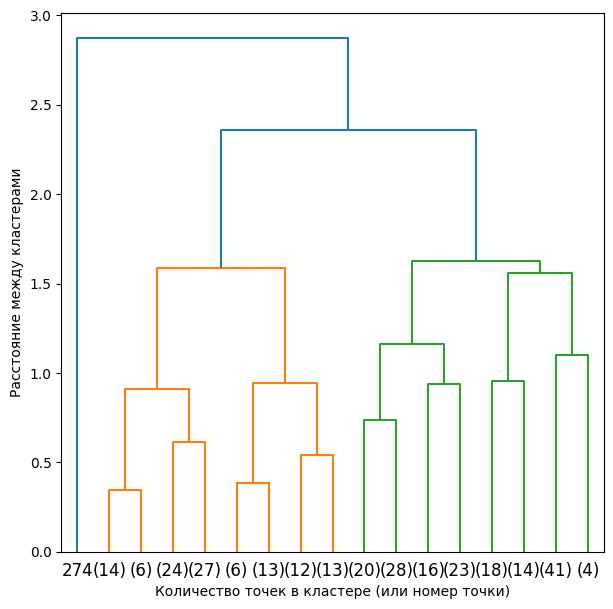

In [ ]:
plot_dendrogram(agc10_average, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

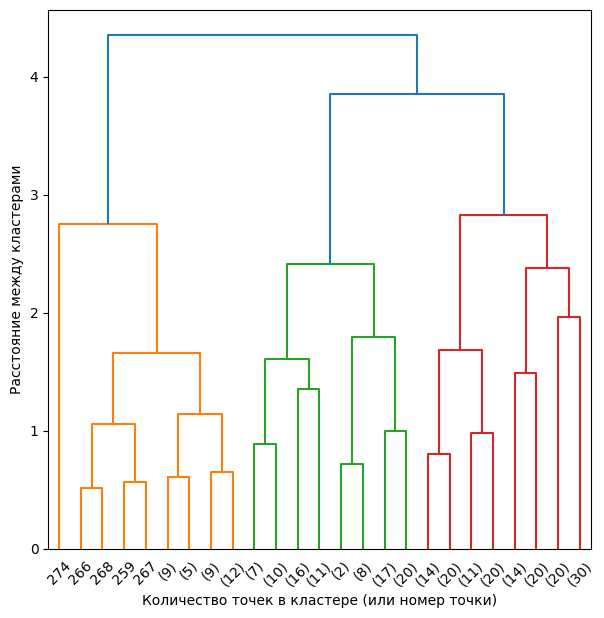

In [ ]:
plot_dendrogram(agc10_complete, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

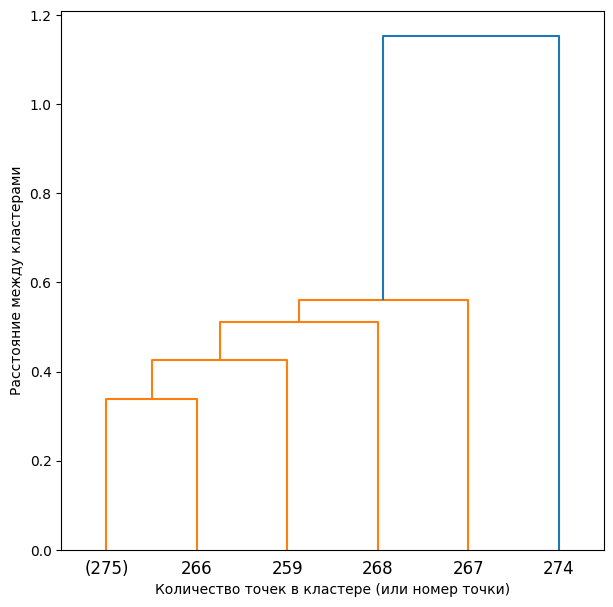

In [ ]:
plot_dendrogram(agc10_single, truncate_mode="level", p=4)
plt.ylabel('Расстояние между кластерами')
plt.xlabel('Количество точек в кластере (или номер точки)')
plt.show()

### **4.2. Диаграммы рассеивания**

<Axes: xlabel='x', ylabel='y'>

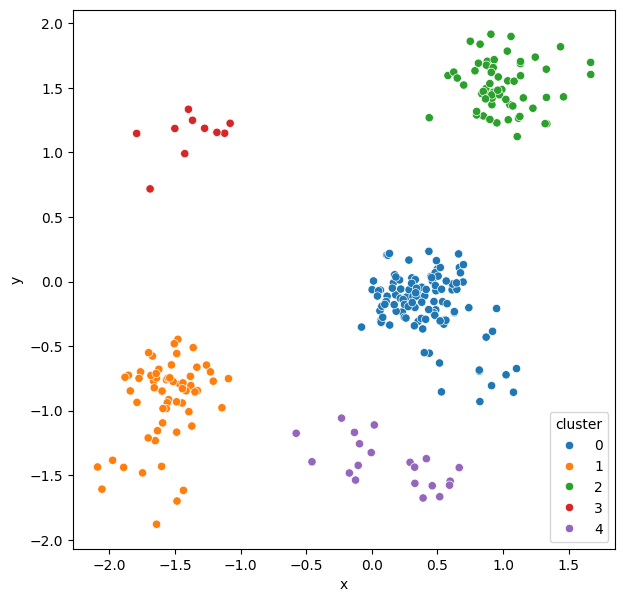

In [ ]:
sns.scatterplot(blobs_agc_ward, x='x', y='y', hue='cluster', palette='tab10')

<Axes: xlabel='x', ylabel='y'>

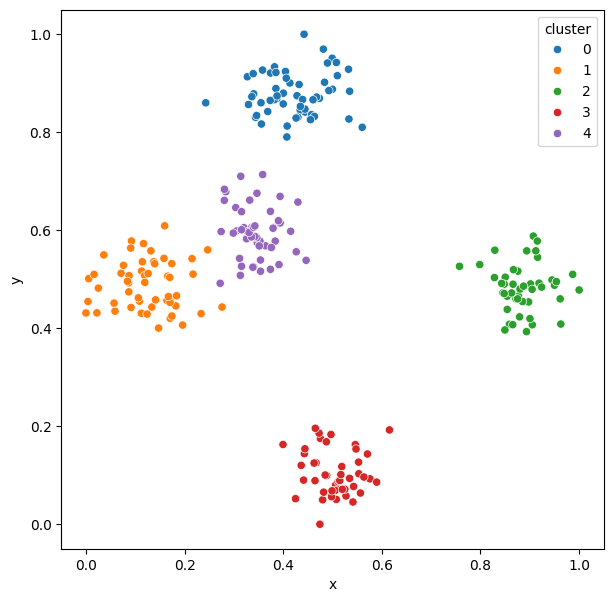

In [ ]:
sns.scatterplot(checker_agc_ward, x='x', y='y', hue='cluster', palette='tab10')

In [ ]:
sns.scatterplot(noisymoons_agc_single, x='x', y='y', hue='cluster', palette='tab10')

## **5. Анализ набора данных с большим количеством признаков**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **5.1. Анализ данных**

### **5.1.1. Исследование**

In [ ]:
red_wine_df = pd.read_csv('lab2_winequality_red.csv')

In [ ]:
red_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

**Корреляции**

---



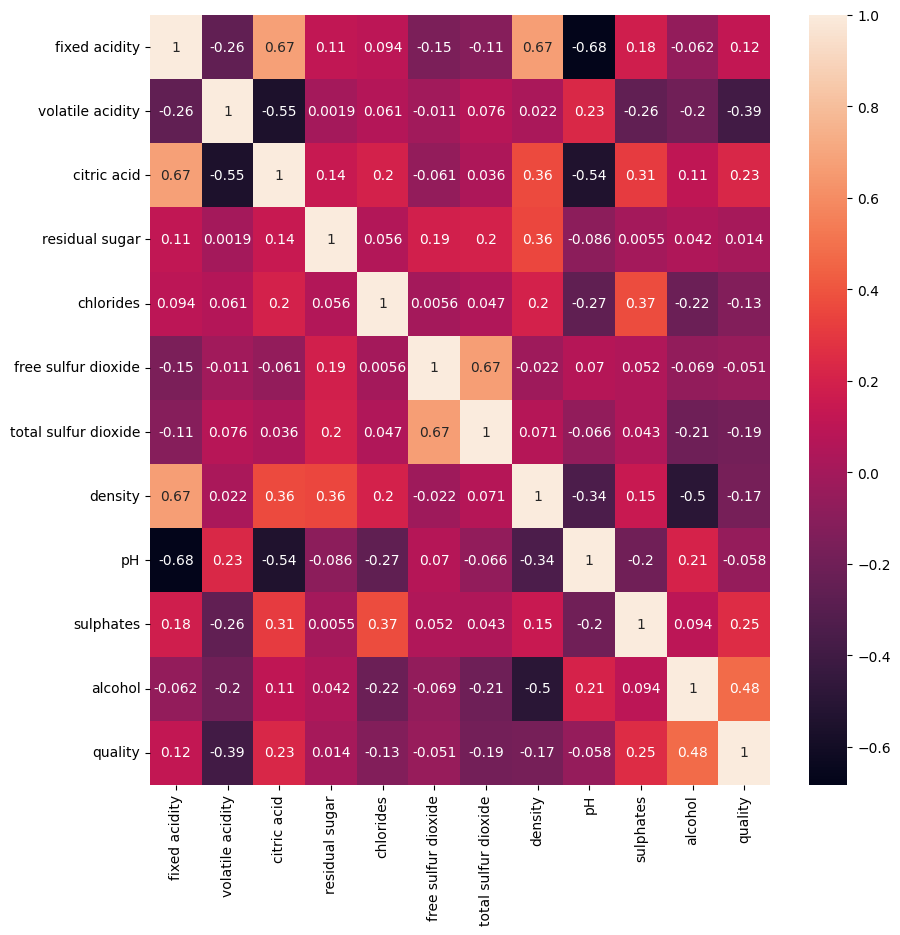

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(red_wine_df.corr(), annot=True, ax=ax)
fig.show()

**Медианы**

---


- Чем выше качество, тем выше `fixed acidity`, `sulphates`, `citric acid` и ниже `ph` и `volatile acidity`, `chlorides`
- Плотность остается одинаковой.
- Алкоголь, сахар и диоксиды имеют более сложные зависимости.

In [ ]:
red_wine_df.groupby('quality').median()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 7.50             0.845        0.035             2.1   
4                 7.50             0.670        0.090             2.1   
5                 7.80             0.580        0.230             2.2   
6                 7.90             0.490        0.260             2.2   
7                 8.80             0.370        0.400             2.3   
8                 8.25             0.370        0.420             2.1   

         chlorides  free sulfur dioxide  total sulfur dioxide   density    pH  \
quality                                                                         
3           0.0905                  6.0                  15.0  0.997565  3.39   
4           0.0800                 11.0                  26.0  0.996500  3.37   
5           0.0810                 15.0                  47.0  0.997000  3.30   
6           0.0780                 14.0                  35.0  0.996560  3.32   
7           0.0730                 11.0                  27.0  0.995770  3.28   
8           0.0705                  7.5                  21.5  0.994940  3.23   

         sulphates  alcohol  
quality                      
3            0.545    9.925  
4            0.560   10.000  
5            0.580    9.700  
6            0.640   10.500  
7            0.740   11.500  
8            0.740   12.150

array([[<Axes: title={'center': 'quality'}>]], dtype=object)

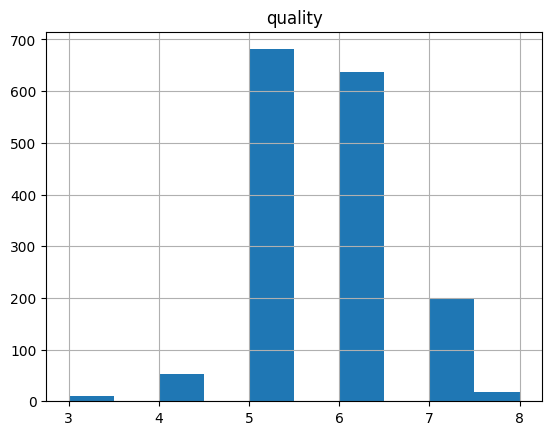

In [ ]:
red_wine_df[['quality']].hist()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

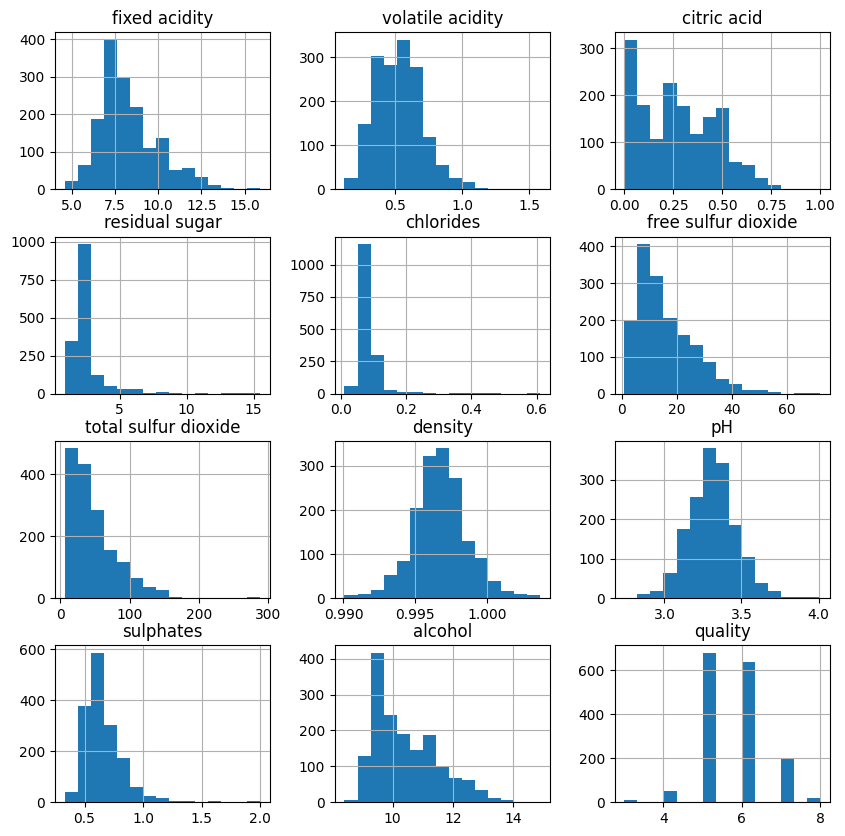

In [ ]:
red_wine_df.hist(figsize=(10, 10), bins=15)

In [ ]:
red_wine_df.describe()

NameError: name 'red_wine_df' is not defined

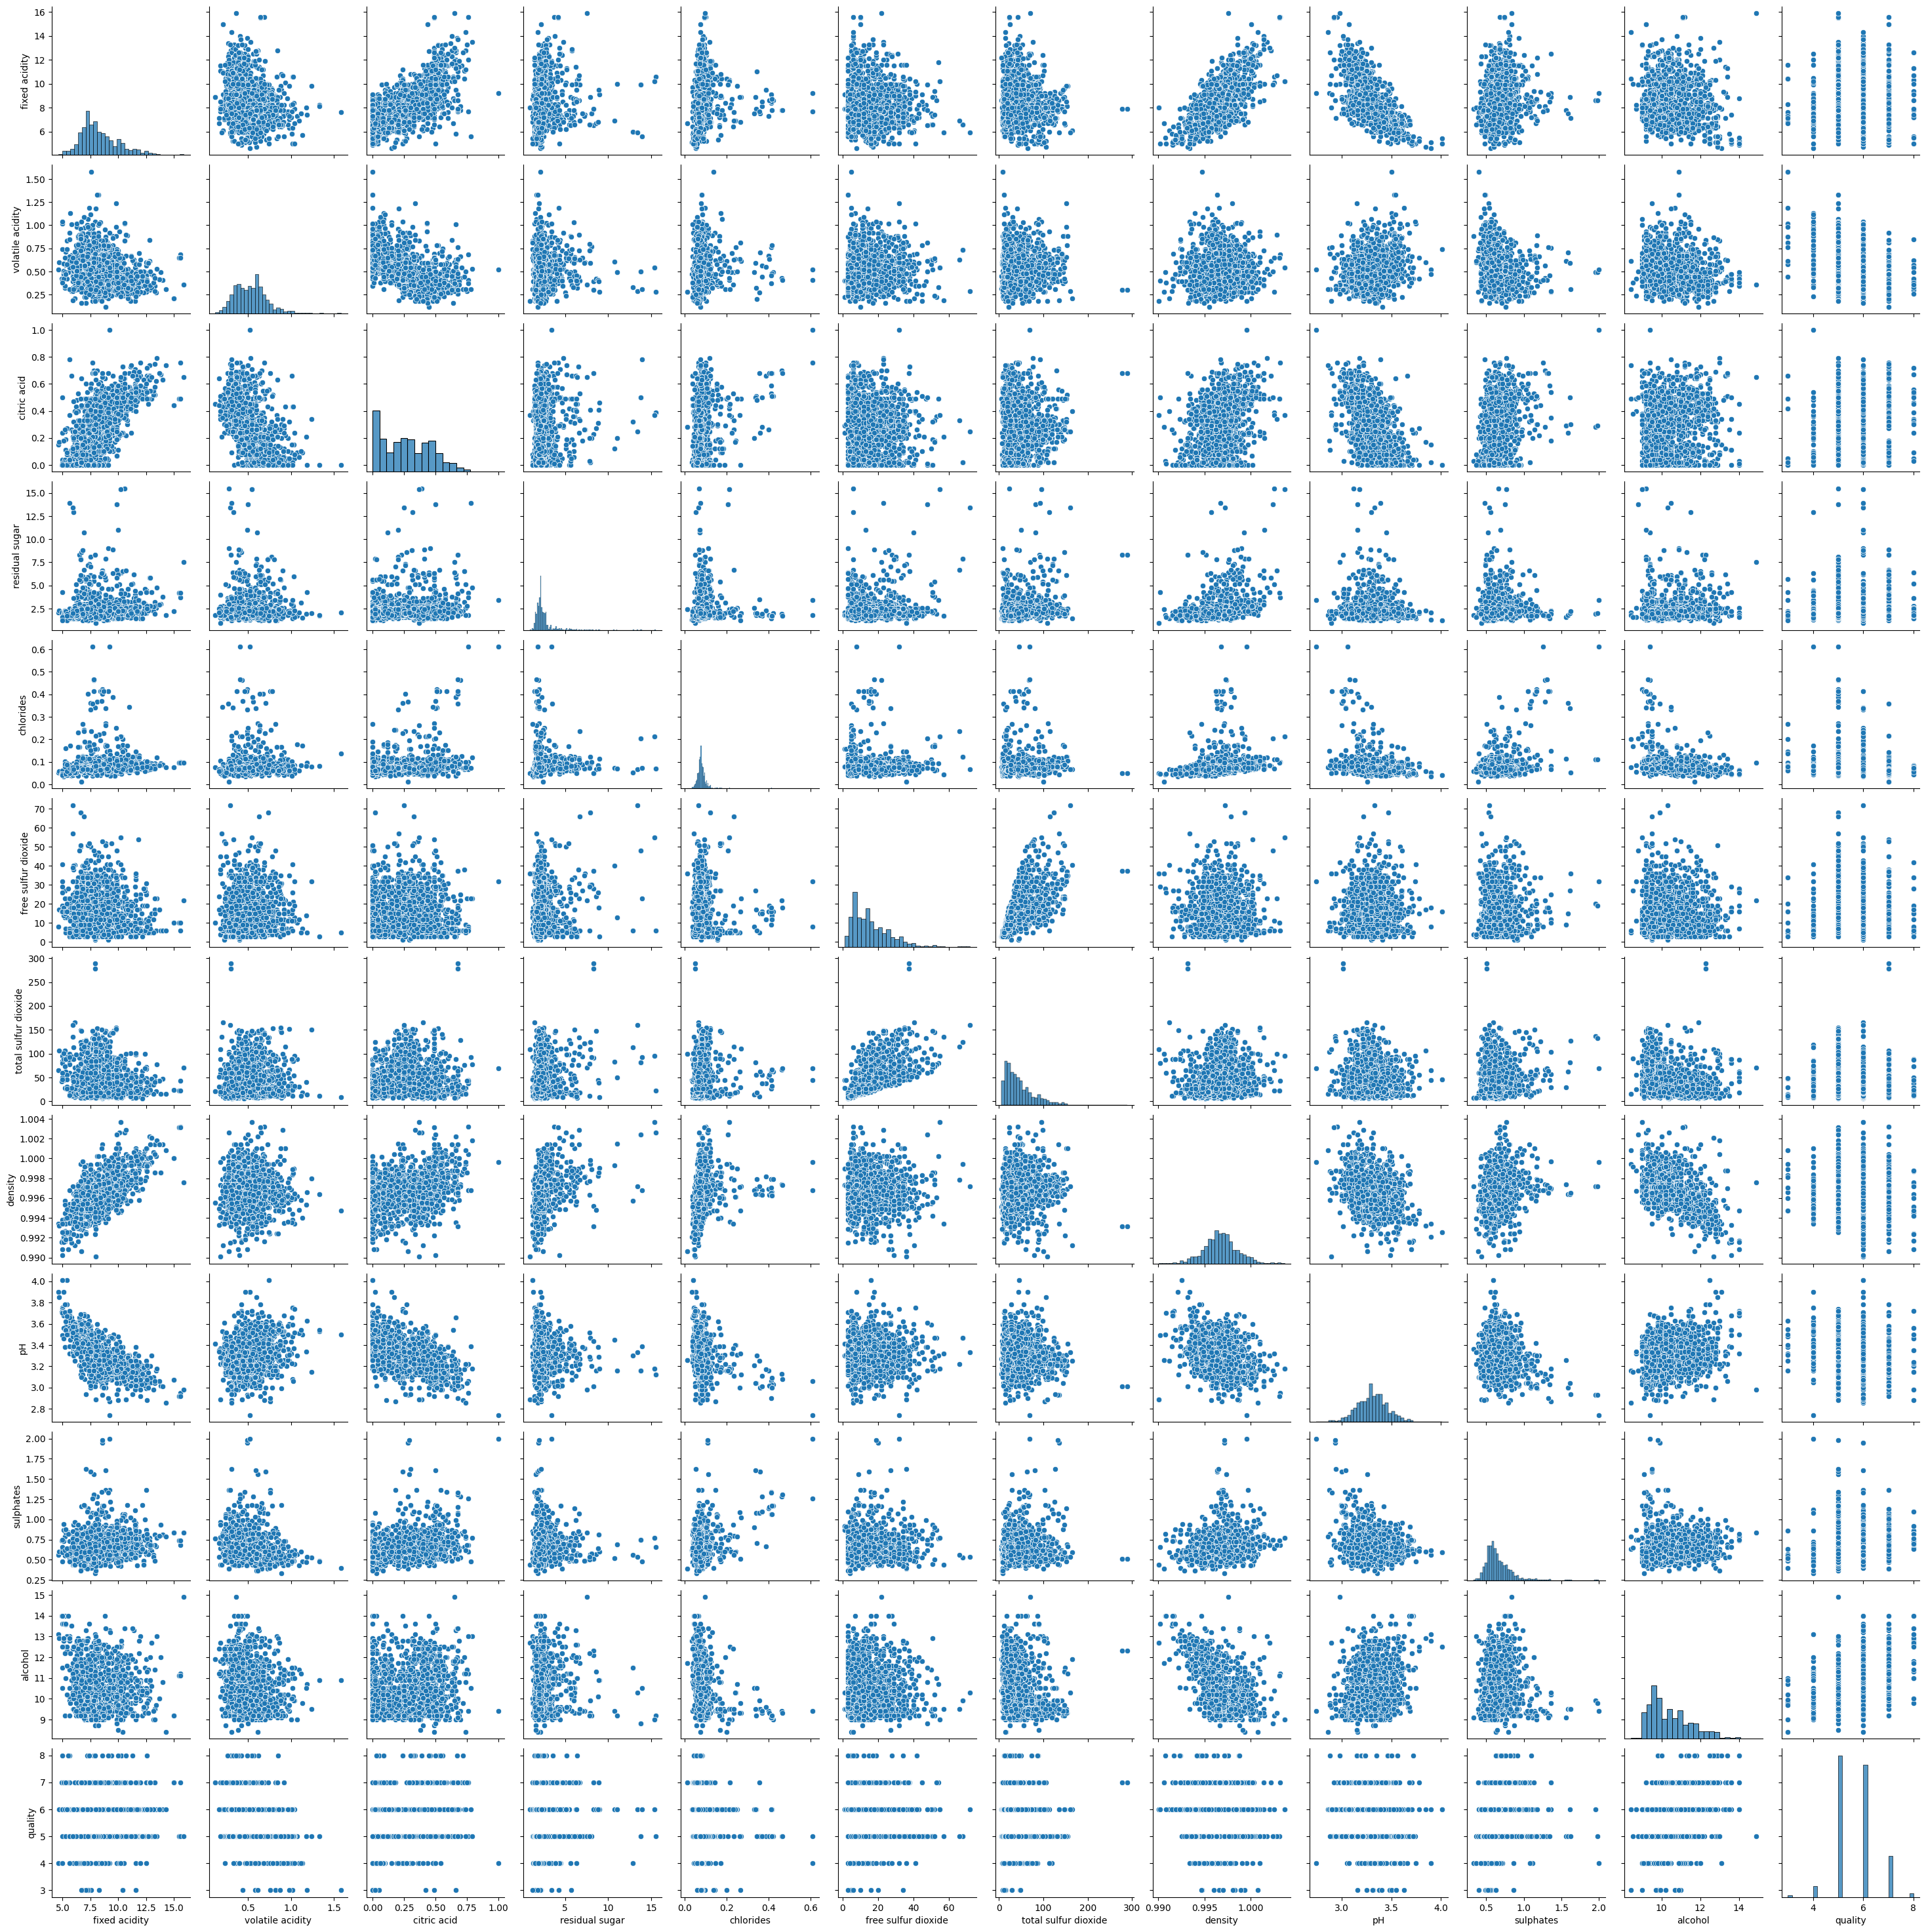

In [ ]:
sns.pairplot(red_wine_df)

<Axes: xlabel='quality', ylabel='Proportion'>

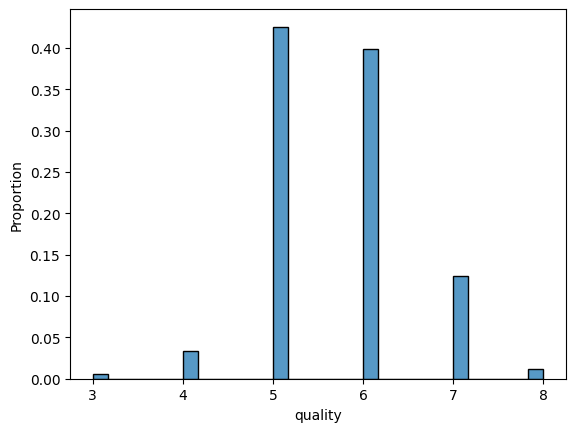

In [ ]:
sns.histplot(red_wine_df, x='quality', stat='proportion')

In [ ]:
red_wine_df.groupby('quality').describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [ ]:
red_wine_df.groupby('alcohol').describe()

fixed acidity                                                    \
                  count       mean       std   min     25%    50%     75%   
alcohol                                                                     
8.400000            2.0  12.350000  2.757716  10.4  11.375  12.35  13.325   
8.500000            1.0  10.000000       NaN  10.0  10.000  10.00  10.000   
8.700000            2.0   8.050000  0.212132   7.9   7.975   8.05   8.125   
8.800000            2.0   9.900000  0.000000   9.9   9.900   9.90   9.900   
9.000000           30.0   8.793333  1.872659   7.0   7.525   8.10   9.600   
...                 ...        ...       ...   ...     ...    ...     ...   
13.500000           1.0   5.800000       NaN   5.8   5.800   5.80   5.800   
13.566667           1.0   5.300000       NaN   5.3   5.300   5.30   5.300   
13.600000           4.0   5.700000  1.140175   5.0   5.075   5.20   5.825   
14.000000           7.0   5.657143  1.399830   4.9   5.000   5.20   5.350   
14.900000           1.0  15.900000       NaN  15.9  15.900  15.90  15.900   

                volatile acidity            ... sulphates       quality  \
            max            count      mean  ...       75%   max   count   
alcohol                                     ...                           
8.400000   14.3              2.0  0.460000  ...    0.7500  0.79     2.0   
8.500000   10.0              1.0  0.380000  ...    0.6500  0.65     1.0   
8.700000    8.2              2.0  0.330000  ...    0.8400  0.87     2.0   
8.800000    9.9              2.0  0.500000  ...    0.7500  0.75     2.0   
9.000000   13.3             30.0  0.586833  ...    0.6075  1.17    30.0   
...         ...              ...       ...  ...       ...   ...     ...   
13.500000   5.8              1.0  0.290000  ...    0.5400  0.54     1.0   
13.566667   5.3              1.0  0.470000  ...    0.8800  0.88     1.0   
13.600000   7.4              4.0  0.412500  ...    0.8800  0.88     4.0   
14.000000   8.8              7.0  0.407143  ...    0.7900  0.82     7.0   
14.900000  15.9              1.0  0.360000  ...    0.8400  0.84     1.0   

                                                          
               mean       std  min   25%  50%   75%  max  
alcohol                                                   
8.400000   4.500000  2.121320  3.0  3.75  4.5  5.25  6.0  
8.500000   5.000000       NaN  5.0  5.00  5.0  5.00  5.0  
8.700000   6.000000  0.000000  6.0  6.00  6.0  6.00  6.0  
8.800000   5.000000  0.000000  5.0  5.00  5.0  5.00  5.0  
9.000000   5.400000  0.770132  3.0  5.00  6.0  6.00  6.0  
...             ...       ...  ...   ...  ...   ...  ...  
13.500000  6.000000       NaN  6.0  6.00  6.0  6.00  6.0  
13.566667  7.000000       NaN  7.0  7.00  7.0  7.00  7.0  
13.600000  6.750000  0.500000  6.0  6.75  7.0  7.00  7.0  
14.000000  6.714286  0.951190  6.0  6.00  6.0  7.50  8.0  
14.900000  5.000000       NaN  5.0  5.00  5.0  5.00  5.0  

[65 rows x 88 columns]

### **5.1.2. Предобработка**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_s = StandardScaler()
std_s.set_output(transform='pandas')
X = std_s.fit_transform(red_wine_df.drop('quality', axis=1))

### **5.1.3. Кластеризация**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

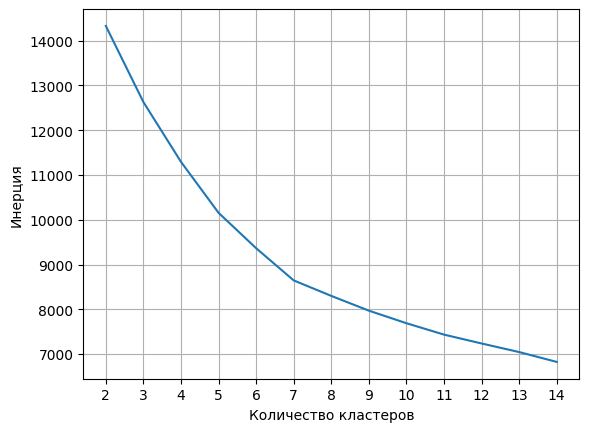

In [ ]:
inertions = []
clusters_num = np.arange(2, 15)
for i in clusters_num:
    k_means_temp = KMeans(n_clusters=i, n_init=20)
    k_means_temp.fit(X)
    inertions.append(k_means_temp.inertia_)


plt.plot(clusters_num, inertions)
plt.ylabel('Инерция')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_num)
plt.grid()
plt.show()

# Метод локтя показал, что оптимальное количество кластеров 6, 7.
Выберем меньшее количество, так как в таком случае легче производить анализ.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

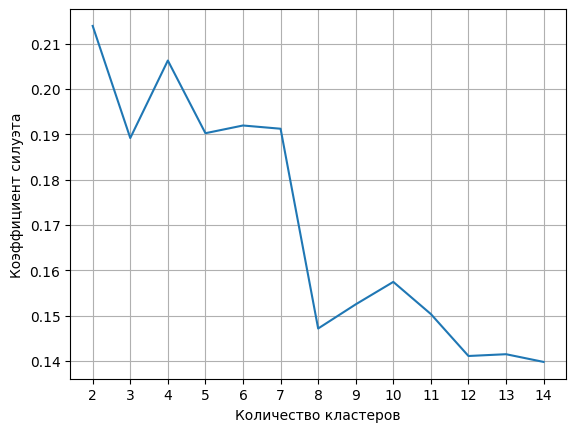

In [ ]:
silhouette_list = []
clusters_num = np.arange(2, 15)
for i in clusters_num:
    k_means_temp = KMeans(n_clusters=i, init='k-means++')
    clusters = k_means_temp.fit_predict(X)
    silhouette_list.append(silhouette_score(X, clusters))


plt.plot(clusters_num, silhouette_list)
plt.ylabel('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.xticks(clusters_num)
plt.grid()
plt.show()

In [ ]:
k_means = KMeans(n_clusters=6, init='k-means++')
clusters = k_means.fit_predict(X)
X['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


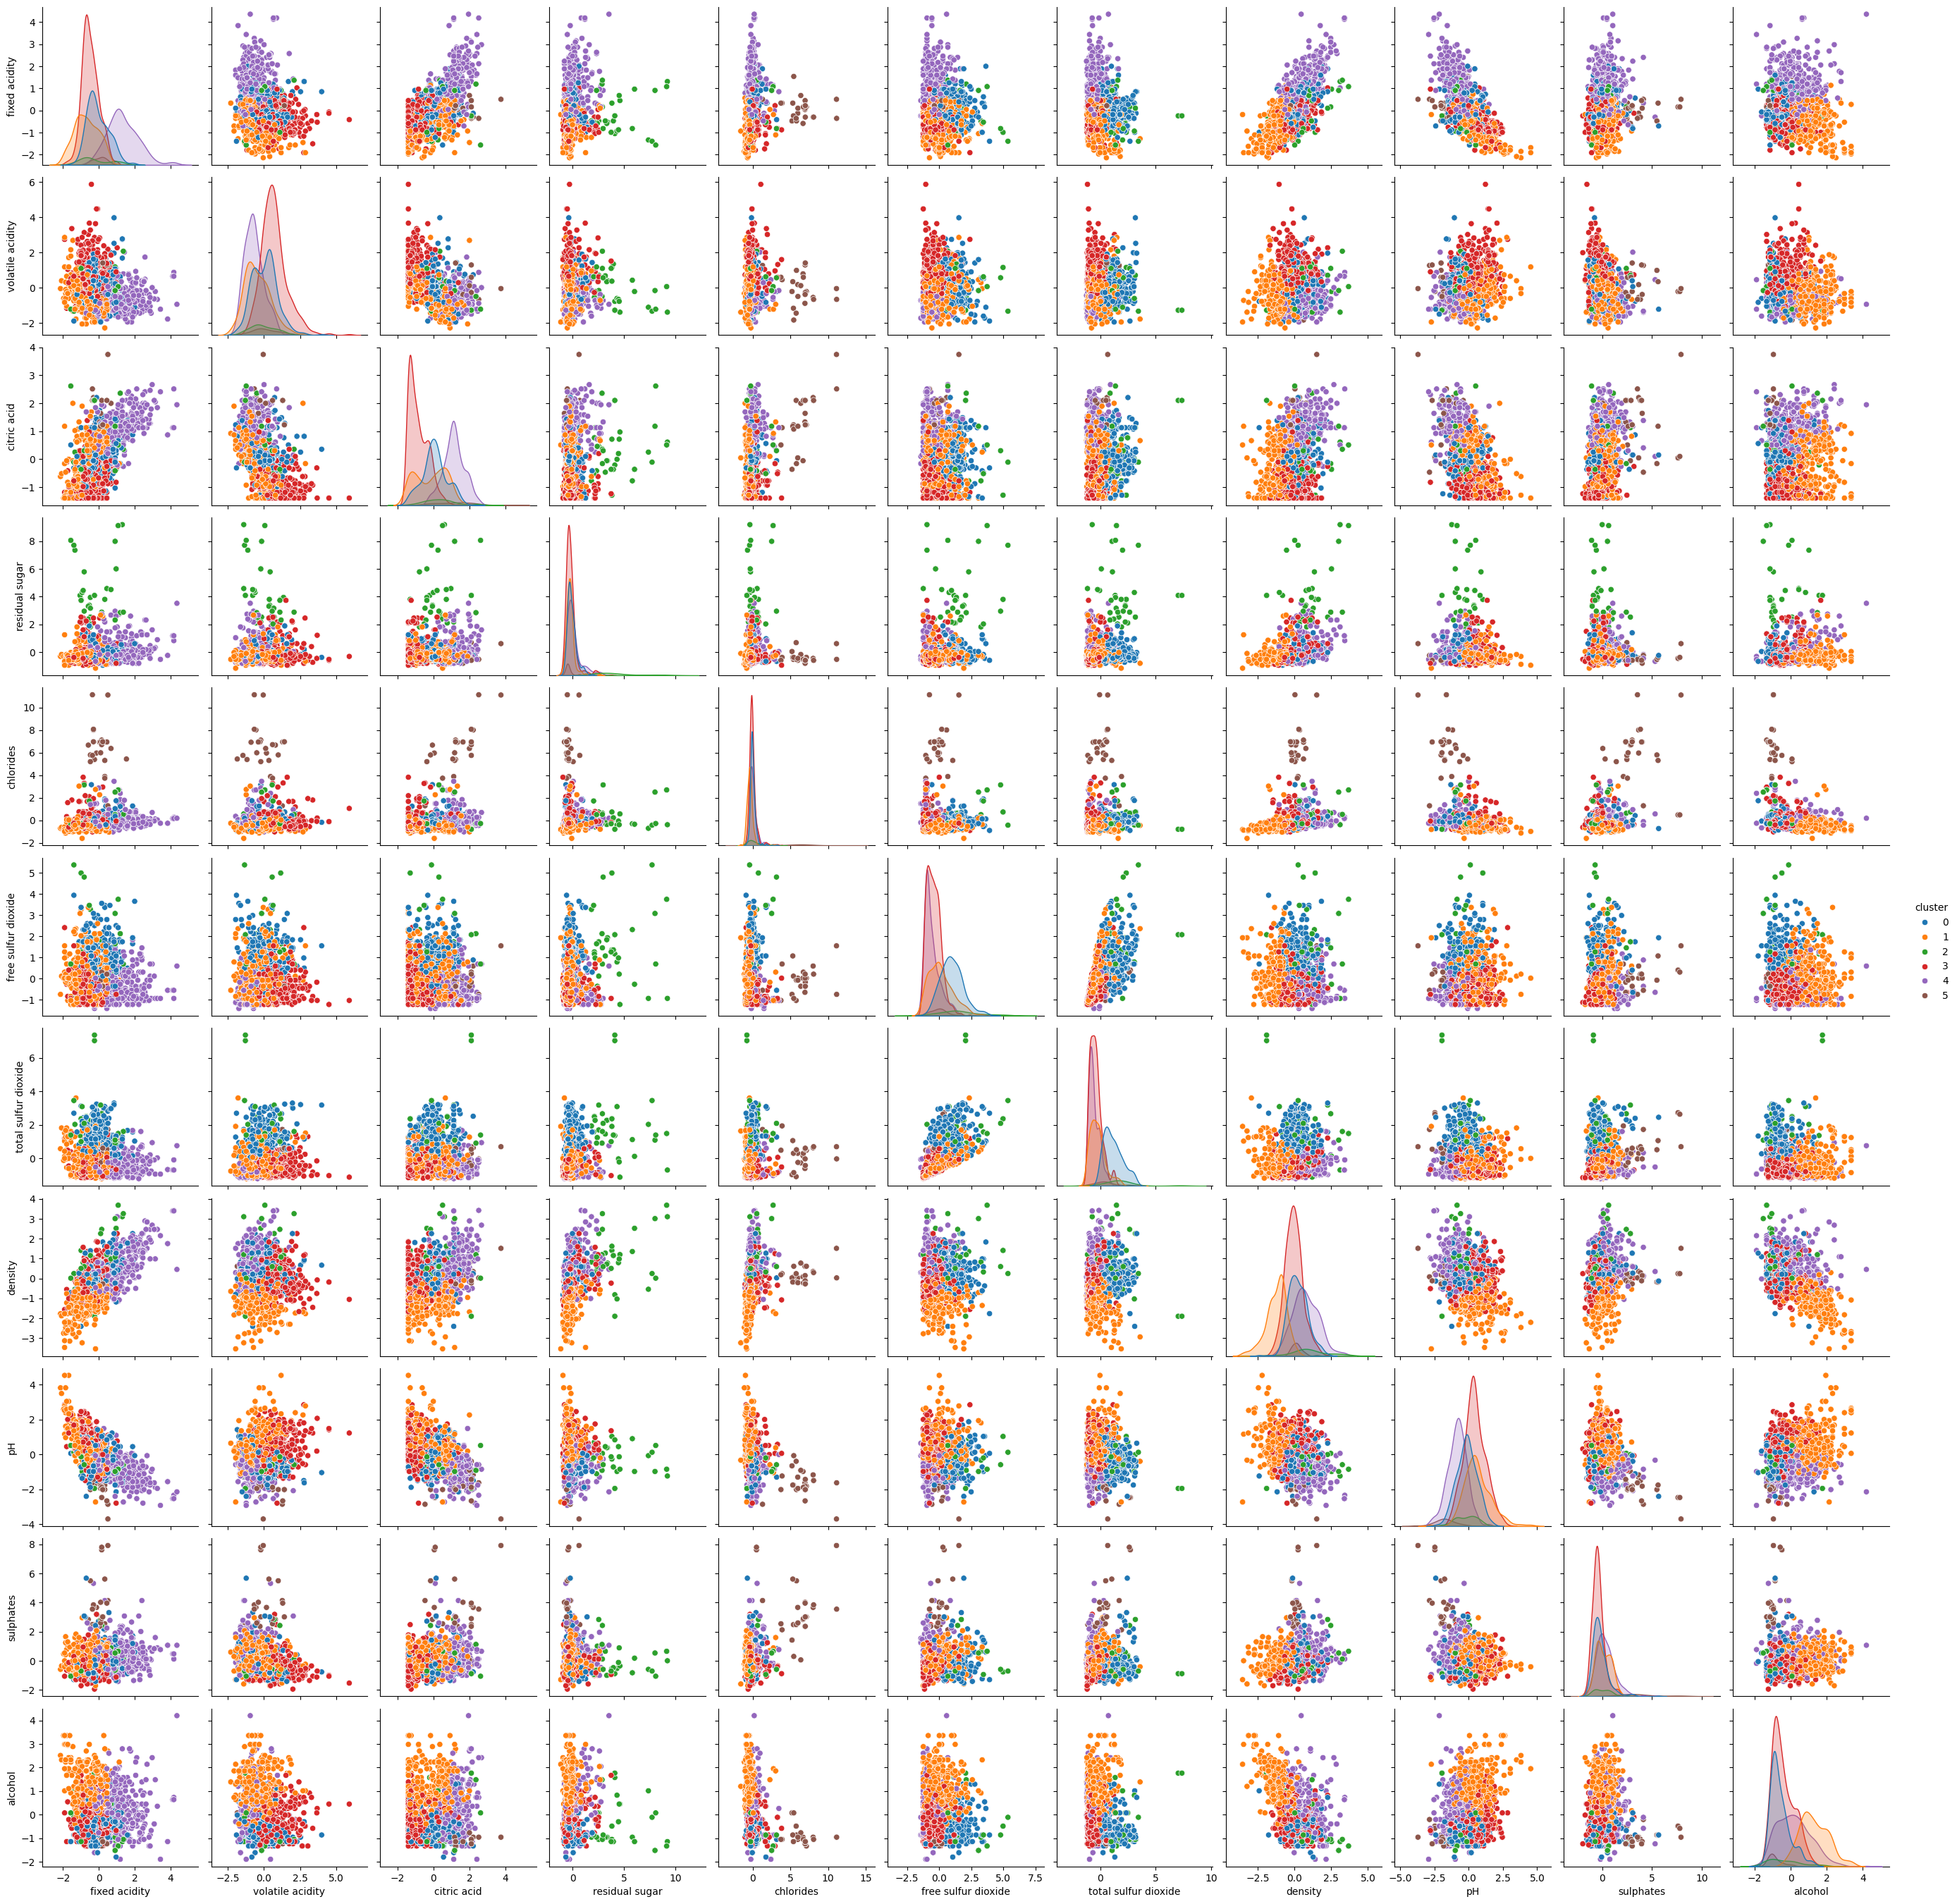

In [ ]:
sns.pairplot(X, hue='cluster', palette='tab10')

Кластер №4 выделяется высокими значения признака fixed axidity.





<Axes: xlabel='fixed acidity'>

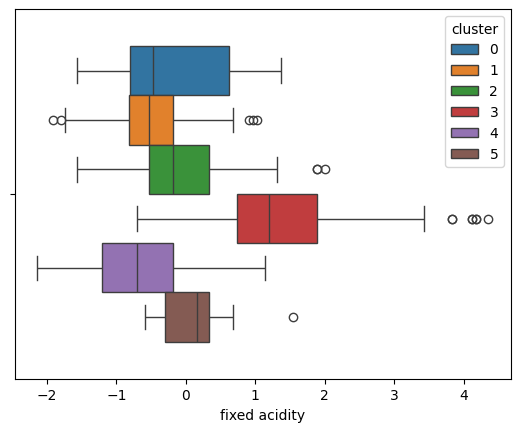

In [ ]:
sns.boxplot(X, x='fixed acidity', hue='cluster', palette='tab10')

<Axes: xlabel='volatile acidity'>

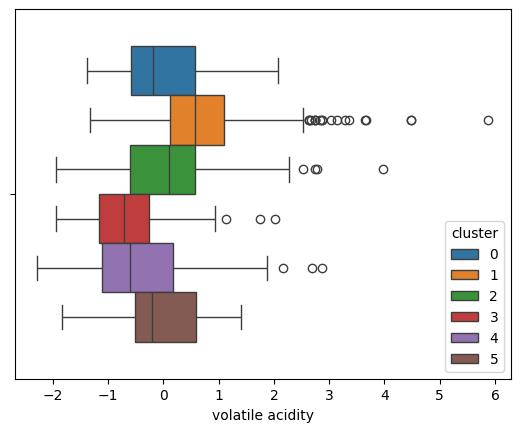

In [ ]:
sns.boxplot(X, x='volatile acidity', hue='cluster', palette='tab10')

Кластеры №4, №5. Выделяются повышенным содержанием лимонной кислоты, к кластера

---

№4 распределение более плотное. Только в 5-ом кластере встречаются очень высокие значения этого параметра.

<Axes: xlabel='citric acid'>

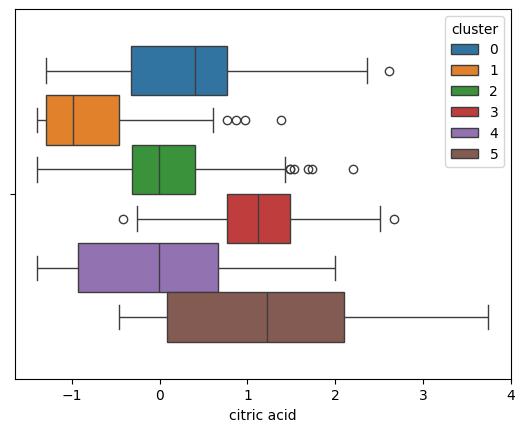

In [ ]:
sns.boxplot(X, x='citric acid', hue='cluster', palette='tab10')

*Кластер* №2 выделяется высокими значениями остаточного сахара, пересечения с другими кластерами связаны только с выбросами в данных. Все остальные кластера имеют схожее по размаху и медиане распределение.

<Axes: xlabel='residual sugar'>

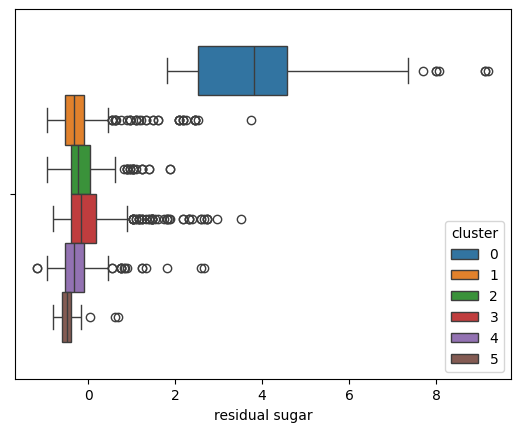

In [ ]:
sns.boxplot(X, x='residual sugar', hue='cluster', palette='tab10')

Кластер №5 выделяется высокими значениями хлоридов, пересечения с другими

*   Новый пункт
*   Новый пункт

кластерами минимальны и связаны с выбросами в данных.

<Axes: xlabel='chlorides'>

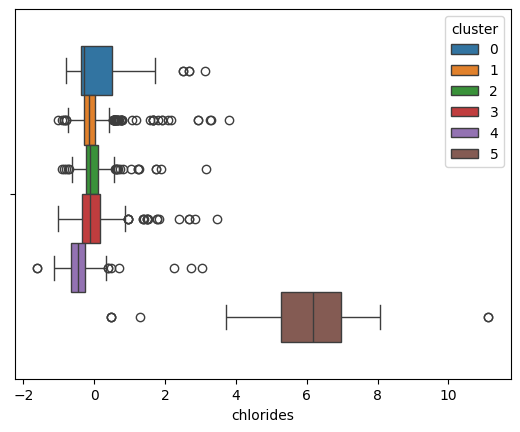

In [ ]:
sns.boxplot(X, x='chlorides', hue='cluster', palette='tab10')

По двум следующим диаграммам видно, что есть два кластера, которые выделяются высокими значениями диоксида серы. Также есть два кластера, которые обладают более низкими значениями этих переменных.

<Axes: xlabel='free sulfur dioxide'>

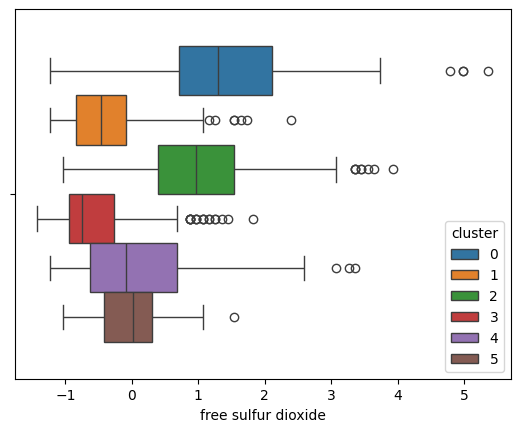

In [ ]:
sns.boxplot(X, x='free sulfur dioxide', hue='cluster', palette='tab10')

<Axes: xlabel='total sulfur dioxide'>

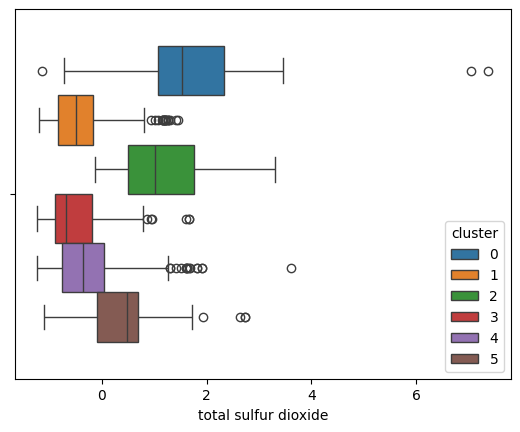

In [ ]:
sns.boxplot(X, x='total sulfur dioxide', hue='cluster', palette='tab10')

Значения плотности вина имеют похожие значения в разных кластерах, имеется незначительное смещение плотности в одном из кластеров.

<Axes: xlabel='density'>

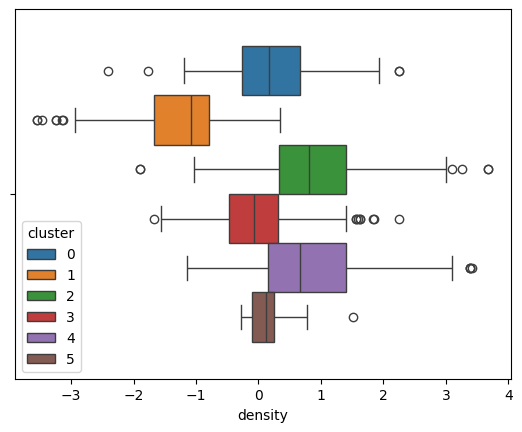

In [ ]:
sns.boxplot(X, x='density', hue='cluster', palette='tab10')

В плане pH также нет серьезных отличий в разных кластерах, в одном из кластеров есть небольшой сдвиг влево.

<Axes: xlabel='pH'>

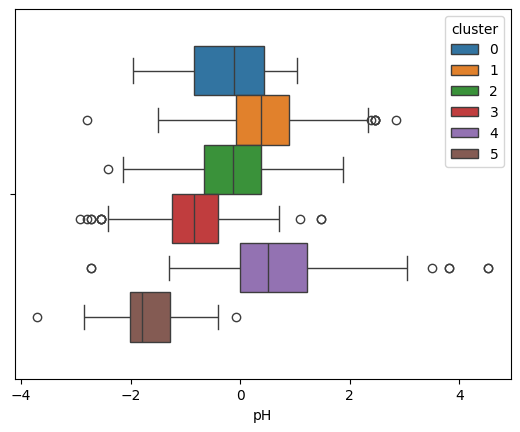

In [ ]:
sns.boxplot(X, x='pH', hue='cluster', palette='tab10')

Кластер №5 отличается в аспекте распределения признака sulphates, все остальные кластеры имеют в основном меньшин значения, между собой мало отличаются.

<Axes: xlabel='sulphates'>

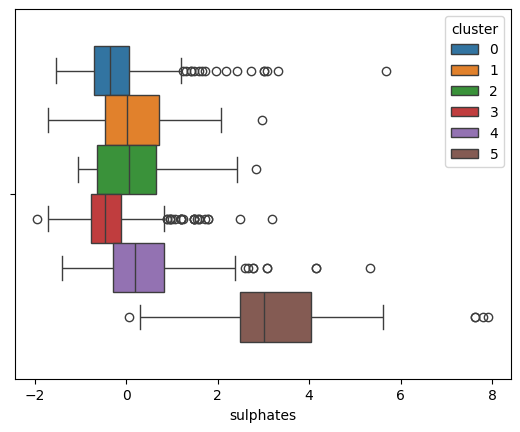

In [ ]:
sns.boxplot(X, x='sulphates', hue='cluster', palette='tab10')

# Кластер №1 выделяется повышенным содержанием алкоголя в сравнении с другими кластерами.

<Axes: xlabel='alcohol'>

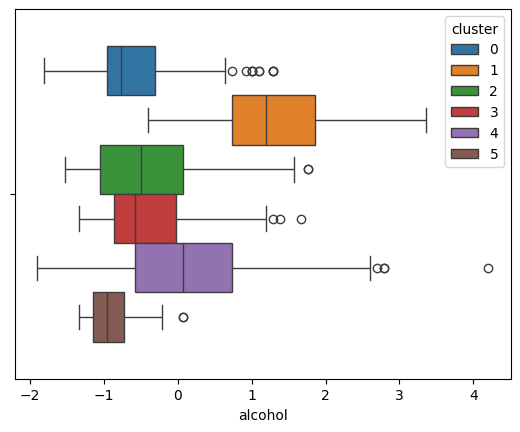

In [ ]:
sns.boxplot(X, x='alcohol', hue='cluster', palette='tab10')